## Import necessary libraries and magic

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from sklearn.decomposition import PCA
import pandas as pd
from scipy import stats
import numpy.random as npr
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.manifold import LocallyLinearEmbedding as LLE
import warnings
warnings.filterwarnings('ignore')
import cv2
import joblib

## Load data

In [2]:
X_train = np.load('data_train.npy').T
t_train = np.load('labels_train_corrected.npy')
X_test = np.load('data_test.npy').T
t_test = np.load('labels_test_corrected.npy')

## Resize and downsample the data

In [3]:
X_train_resize = np.zeros((X_train.shape[0],2500))
for i in range(X_train.shape[0]):
    im1 = X_train[i,:].reshape(300,300)
    res = cv2.resize(im1,dsize=(50,50),interpolation = cv2.INTER_CUBIC)
    X_train_resize[i] = res.reshape(2500)

In [4]:
X_test_resize = np.zeros((X_test.shape[0],2500))

for i in range(X_test.shape[0]):
    im1 = X_test[i,:].reshape(300,300)
    res = cv2.resize(im1,dsize=(50,50),interpolation = cv2.INTER_CUBIC)
    X_test_resize[i] = res.reshape(2500)

## Question 1

In [5]:
# Load the saved models
final_logisticregression_rfe_model = joblib.load("final_logisticregression_rfe_model.pkl")
final_svm_rfe_model = joblib.load("final_svm_rfe_model.pkl")

# Predict the output on test datasets
logic_rfe_out = final_logisticregression_rfe_model.predict(X_test_resize)
svm_rfe_out = final_svm_rfe_model.predict(X_test_resize)

### Classfication report for Logistic Regression with RFE

In [6]:
print(classification_report(t_test,logic_rfe_out))

              precision    recall  f1-score   support

         0.0       0.40      0.43      0.41       274
         1.0       0.33      0.32      0.32       273
         2.0       0.36      0.53      0.43       285
         3.0       0.41      0.37      0.39       296
         4.0       0.38      0.30      0.33       309
         5.0       0.38      0.31      0.34       296
         6.0       0.37      0.40      0.38       291
         7.0       0.35      0.40      0.37       280
         8.0       0.41      0.39      0.40       291
         9.0       0.44      0.37      0.40       285

    accuracy                           0.38      2880
   macro avg       0.38      0.38      0.38      2880
weighted avg       0.38      0.38      0.38      2880



### Classfication report for SVM with RFE

In [7]:
print(classification_report(t_test,svm_rfe_out))

              precision    recall  f1-score   support

         0.0       0.41      0.41      0.41       274
         1.0       0.35      0.25      0.29       273
         2.0       0.33      0.62      0.43       285
         3.0       0.42      0.37      0.39       296
         4.0       0.45      0.27      0.34       309
         5.0       0.39      0.26      0.32       296
         6.0       0.44      0.40      0.42       291
         7.0       0.34      0.40      0.37       280
         8.0       0.38      0.49      0.43       291
         9.0       0.45      0.41      0.43       285

    accuracy                           0.39      2880
   macro avg       0.40      0.39      0.38      2880
weighted avg       0.40      0.39      0.38      2880



### Features selected in Logisctic Regression with RFE, and their Heatmap

In [8]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [9]:
print("Selected features are: ", np.where(final_logisticregression_rfe_model.named_steps["RFE"].support_ == True))

Selected features are:  (array([   0,   10,   15,   25,   28,   44,   45,   50,   51,   53,   58,
         69,   70,   72,   76,   78,   81,   84,   86,   94,   99,  103,
        105,  107,  113,  114,  117,  119,  121,  122,  128,  131,  132,
        140,  145,  146,  151,  159,  160,  162,  163,  164,  165,  169,
        170,  171,  176,  179,  181,  182,  183,  184,  186,  187,  188,
        189,  190,  196,  201,  210,  214,  218,  220,  221,  223,  224,
        228,  229,  230,  231,  242,  243,  249,  251,  253,  254,  256,
        259,  263,  264,  266,  269,  274,  275,  276,  277,  278,  279,
        280,  281,  283,  287,  288,  295,  297,  298,  302,  306,  310,
        311,  314,  321,  322,  323,  324,  326,  327,  328,  329,  331,
        333,  336,  338,  339,  346,  351,  352,  356,  357,  359,  362,
        363,  364,  366,  368,  370,  372,  373,  374,  375,  376,  377,
        380,  382,  383,  385,  386,  396,  399,  400,  404,  405,  406,
        407,  410,  412,  

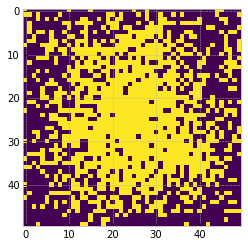

In [10]:
plt.imshow((final_logisticregression_rfe_model.named_steps["RFE"].support_.reshape(50,50)))

### Features selected in SVM with RFE, and their Heatmap

In [11]:
print("Selected features are: ", np.where(final_svm_rfe_model.named_steps["RFE"].support_ == True))

Selected features are:  (array([   6,    7,    8,    9,   10,   11,   12,   13,   14,   15,   16,
         17,   18,   19,   20,   21,   22,   23,   24,   25,   26,   27,
         28,   29,   30,   31,   32,   33,   34,   35,   36,   37,   38,
         39,   40,   41,   42,   43,   44,   45,   46,   47,   48,   49,
         50,   51,   52,   53,   54,   55,   56,   57,   58,   59,   60,
         61,   62,   63,   64,   65,   66,   67,   68,   69,   70,   71,
         72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,
         94,   95,   96,   97,   98,   99,  100,  101,  102,  103,  104,
        105,  106,  107,  108,  109,  110,  111,  112,  113,  114,  115,
        116,  117,  118,  119,  120,  121,  122,  123,  124,  125,  126,
        127,  128,  129,  130,  131,  132,  133,  134,  135,  136,  137,
        138,  139,  140,  141,  143,  160,  161,  162,  164,  171,  176,
        177,  179,  181,  

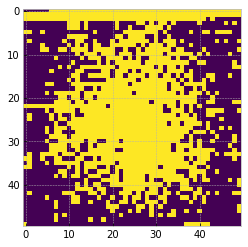

In [12]:
plt.imshow((final_svm_rfe_model.named_steps["RFE"].support_.reshape(50,50)))

### Display Mask from training dataset for Logistic Regression with RFE

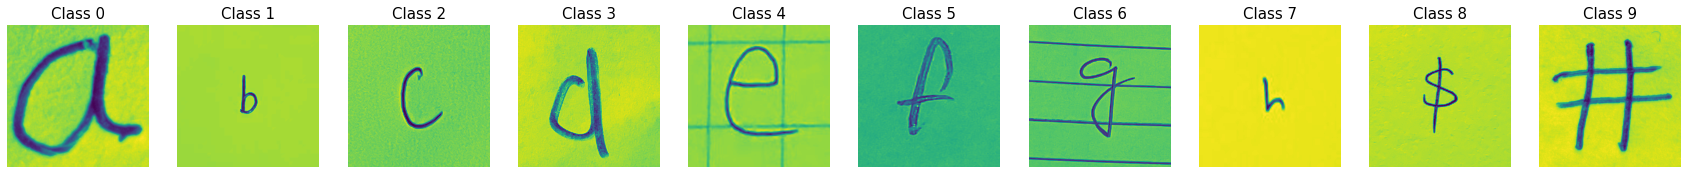

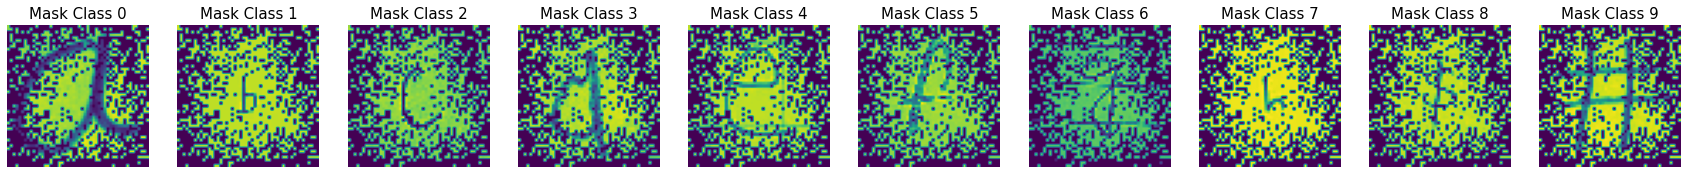

In [13]:
plt.figure(figsize=(30,30))
for i in range(10):
    index = np.where(t_train==i)
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[index[0][0],:].reshape((300,300)))
    plt.axis('off');plt.title('Class '+str(int(t_train[index[0][0]])),size=15)
plt.figure(figsize=(30,30))
for i in range(10):
    index = np.where(t_train==i)
    plt.subplot(1,10,i+1)
    plt.imshow((X_train_resize[index[0][0],:].reshape(50,50)*final_logisticregression_rfe_model.named_steps["RFE"].support_.reshape(50,50)))
    plt.axis('off');plt.title('Mask Class '+str(int(t_train[index[0][0]])),size=15)

### Display Mask from training dataset for SVM with RFE

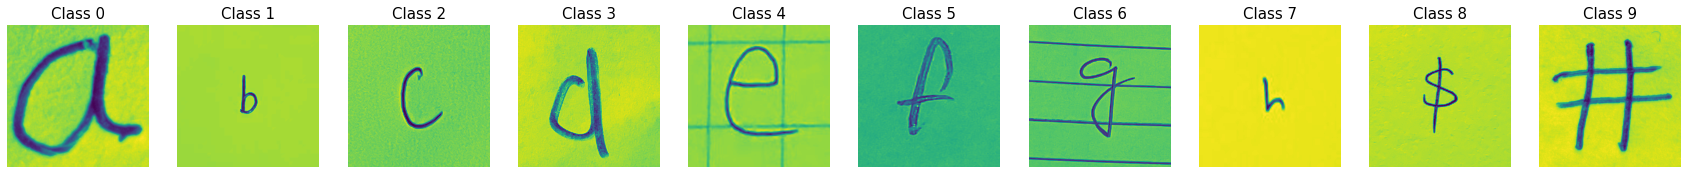

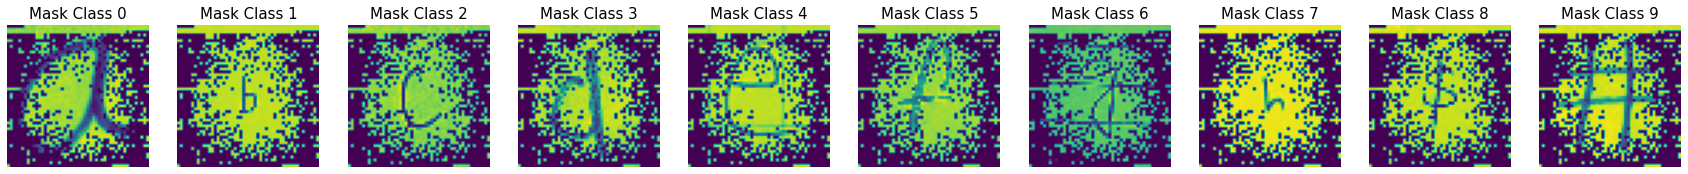

In [14]:
plt.figure(figsize=(30,30))
for i in range(10):
    index = np.where(t_train==i)
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[index[0][0],:].reshape((300,300)))
    plt.axis('off');plt.title('Class '+str(int(t_train[index[0][0]])),size=15)
plt.figure(figsize=(30,30))
for i in range(10):
    index = np.where(t_train==i)
    plt.subplot(1,10,i+1)
    plt.imshow((X_train_resize[index[0][0],:].reshape(50,50)*final_svm_rfe_model.named_steps["RFE"].support_.reshape(50,50)))
    plt.axis('off');plt.title('Mask Class '+str(int(t_train[index[0][0]])),size=15)

## Question 2

### Classifier trained on Original Dataset (without PCA)

In [15]:
# Load the Classifier
final_model_svm_original_dataset = joblib.load("final_model_svm_original_dataset.pkl")

# Predict the output on test data
svm_original_out = final_model_svm_original_dataset.predict(X_test_resize)

In [16]:
# Getting the Classification report
print(classification_report(t_test,svm_original_out))

              precision    recall  f1-score   support

         0.0       0.38      0.49      0.43       274
         1.0       0.38      0.41      0.39       273
         2.0       0.34      0.67      0.45       285
         3.0       0.52      0.45      0.48       296
         4.0       0.54      0.33      0.41       309
         5.0       0.40      0.39      0.39       296
         6.0       0.56      0.47      0.51       291
         7.0       0.40      0.39      0.39       280
         8.0       0.59      0.38      0.46       291
         9.0       0.59      0.46      0.52       285

    accuracy                           0.44      2880
   macro avg       0.47      0.44      0.44      2880
weighted avg       0.47      0.44      0.44      2880



### Classifier trained on Reduced Dataset (with PCA)

In [17]:
# Load the Classifier
final_model_svm_reduced_dataset = joblib.load("final_model_svm_reduced_dataset.pkl")

# Predict the output on test data
svm_reduced_out = final_model_svm_reduced_dataset.predict(X_test_resize)

In [18]:
# Getting the Classification report
print(classification_report(t_test,svm_reduced_out))

              precision    recall  f1-score   support

         0.0       0.41      0.49      0.44       274
         1.0       0.39      0.44      0.42       273
         2.0       0.34      0.65      0.45       285
         3.0       0.53      0.48      0.50       296
         4.0       0.56      0.35      0.43       309
         5.0       0.42      0.41      0.41       296
         6.0       0.56      0.50      0.53       291
         7.0       0.39      0.38      0.38       280
         8.0       0.59      0.42      0.49       291
         9.0       0.62      0.48      0.54       285

    accuracy                           0.46      2880
   macro avg       0.48      0.46      0.46      2880
weighted avg       0.48      0.46      0.46      2880



After comparing performances of SVM classifier on original dataset, and SVM classifier on reduced dataset(with PCA), following are my observations-
1. **Training was faster using the reduced dataset. it only took 134.32927584648132 seconds to train on reduced dataset, whereas it took 1886.6072945594788 seconds to train on original dataset.**
2. **After evaluating the classification reports for the performance of both classifiers, it can be concluded that SVM classifier trained on the reduced dataset performed better than the SVM classifier trained on the original dataset. Because the classifier trained on the reduced dataset was faster, and yielded a better accuracy score.**

### Visualizing the top 10 eigenvectors

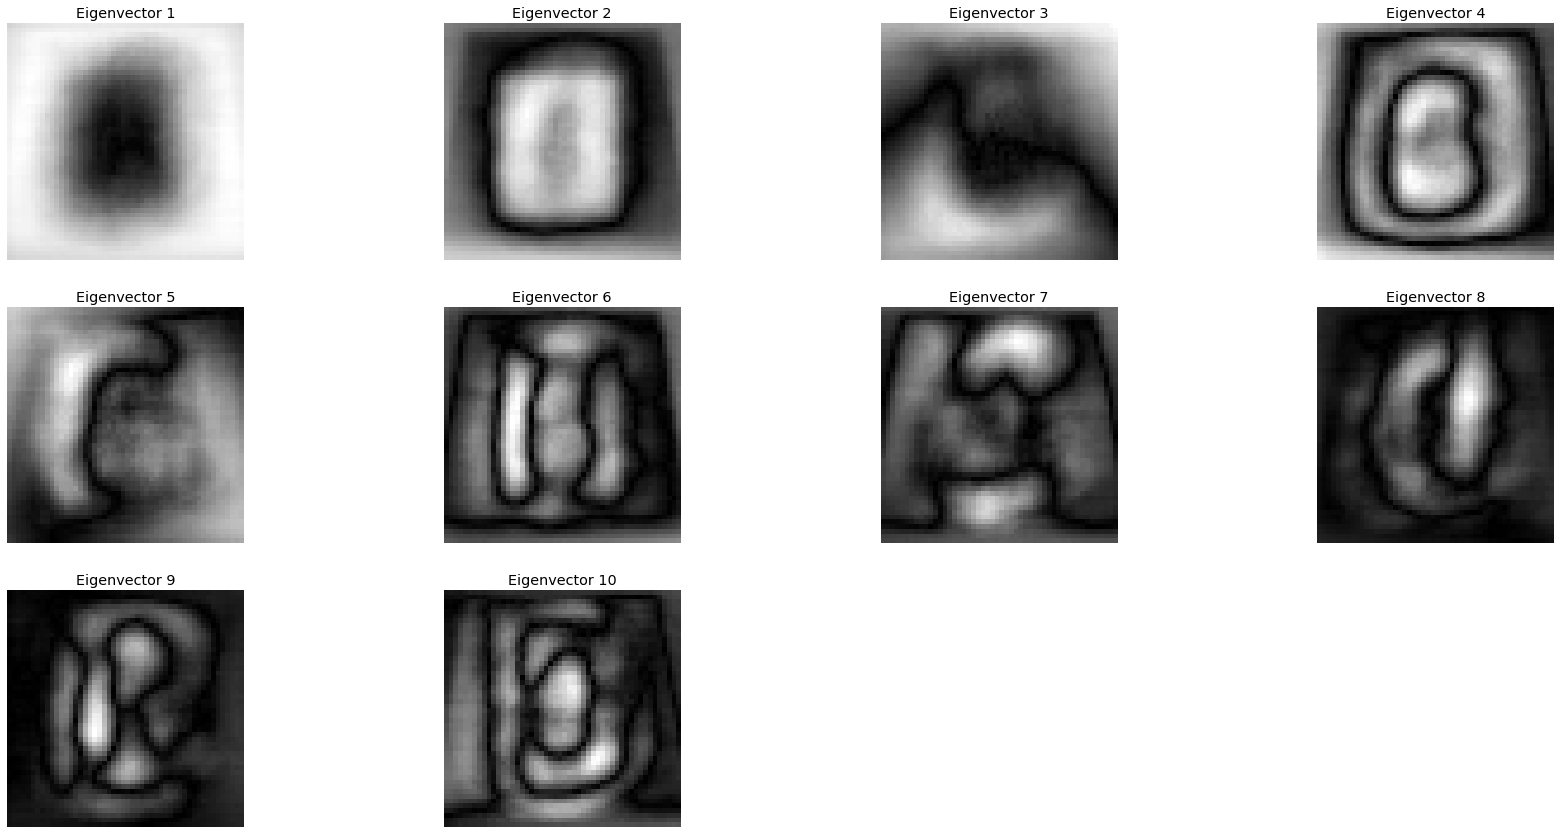

In [19]:
fig=plt.figure(figsize=(30,20))
for i in range(10):
    fig.add_subplot(4,4,i+1)
    plt.imshow(abs(final_model_svm_reduced_dataset.named_steps['PCA'].components_[i,:].reshape(50,50)),cmap='gray')
    plt.axis('off');plt.title('Eigenvector '+str(i+1))

The eigenvectors represent combination of features relating the original classes. It can be seen that there are outlines that represent boundaries(somewhat) of the classes.

### Visualizing examples of image reconstruction from PCA projections

#### On training data

In [20]:
ss = StandardScaler()
ss.fit_transform(X_train_resize)
pca = PCA(n_components = 146)
pca.fit(StandardScaler().fit_transform(X_test_resize))
X_train_resize_scaled = ss.transform(X_train_resize)
X_train_pca = pca.transform(X_train_resize_scaled)
X_train_reconstruct = pca.inverse_transform((X_train_pca))
X_train_reconstructed = ss.inverse_transform(X_train_reconstruct)

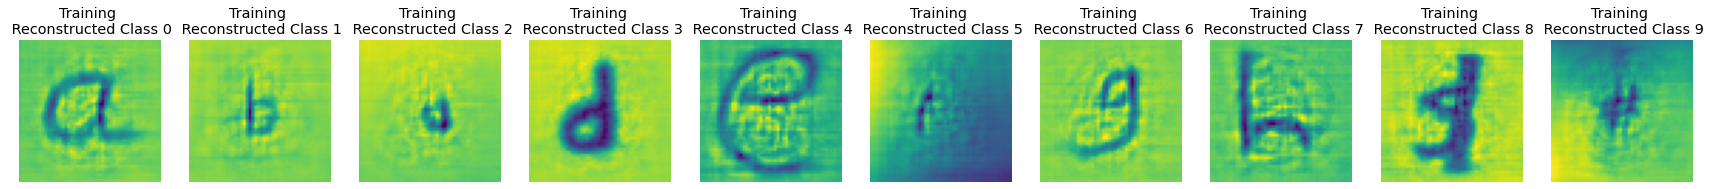

In [21]:
plt.figure(figsize=(30,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train_reconstructed[np.where(t_train==i)[0][1],:].reshape((50,50)))
    plt.title('Training \n Reconstructed Class '+str(i)); plt.axis('off');

#### On testing data

In [22]:
ss = StandardScaler()
ss.fit_transform(X_test_resize)
pca = PCA(n_components = 146)
pca.fit(StandardScaler().fit_transform(X_test_resize))
X_test_resize_scaled = ss.transform(X_test_resize)
X_test_pca = pca.transform(X_test_resize_scaled)
X_test_reconstruct = pca.inverse_transform((X_test_pca))
X_test_reconstructed = ss.inverse_transform(X_test_reconstruct)

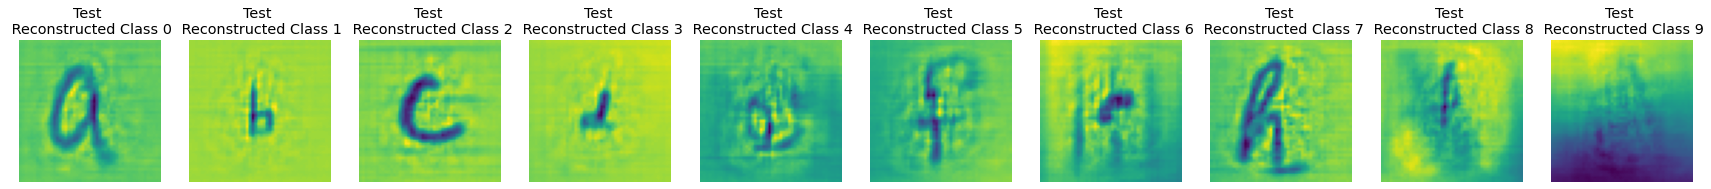

In [23]:
plt.figure(figsize=(30,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_test_reconstructed[np.where(t_test==i)[0][1],:].reshape((50,50)))
    plt.title('Test \n Reconstructed Class '+str(i)); plt.axis('off');

## Question 3

### 2-Dimensional dimentionality reduction and  Visualization

In [24]:
# Load models
lda_model=joblib.load("lda_model.pkl")
ts_model=joblib.load("ts_model.pkl")
pca_model=joblib.load("pca_model.pkl")

### LDA

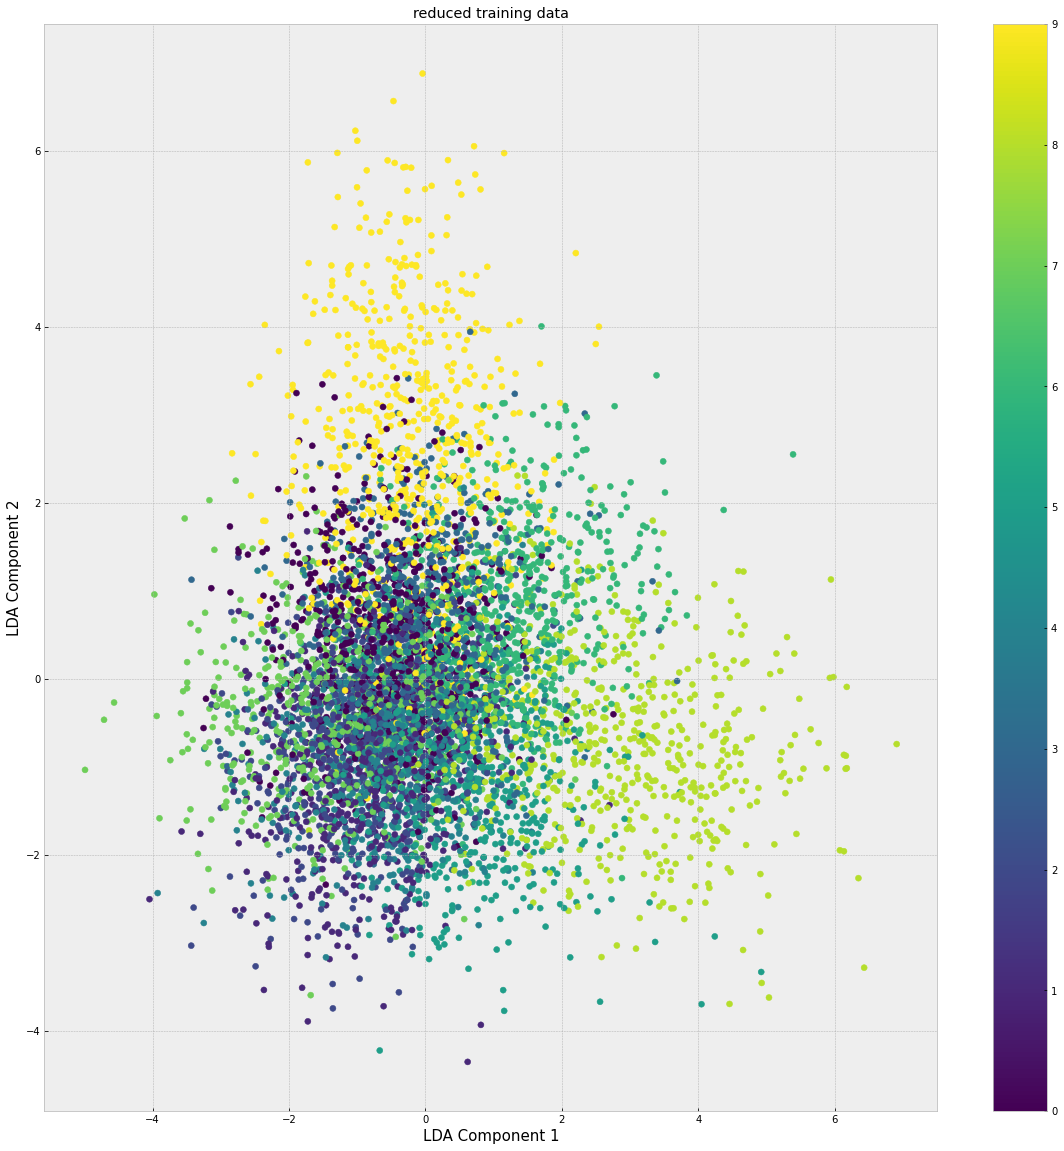

In [25]:
# on training data
lda_out_rd = lda_model.fit_transform(X_train_resize,t_train)
plt.figure(figsize=(20,20))
plt.scatter(lda_out_rd[:,0], lda_out_rd[:,1], c=t_train)
plt.xlabel('LDA Component 1', size=15)
plt.ylabel('LDA Component 2', size=15)
plt.title('reduced training data')
plt.colorbar();

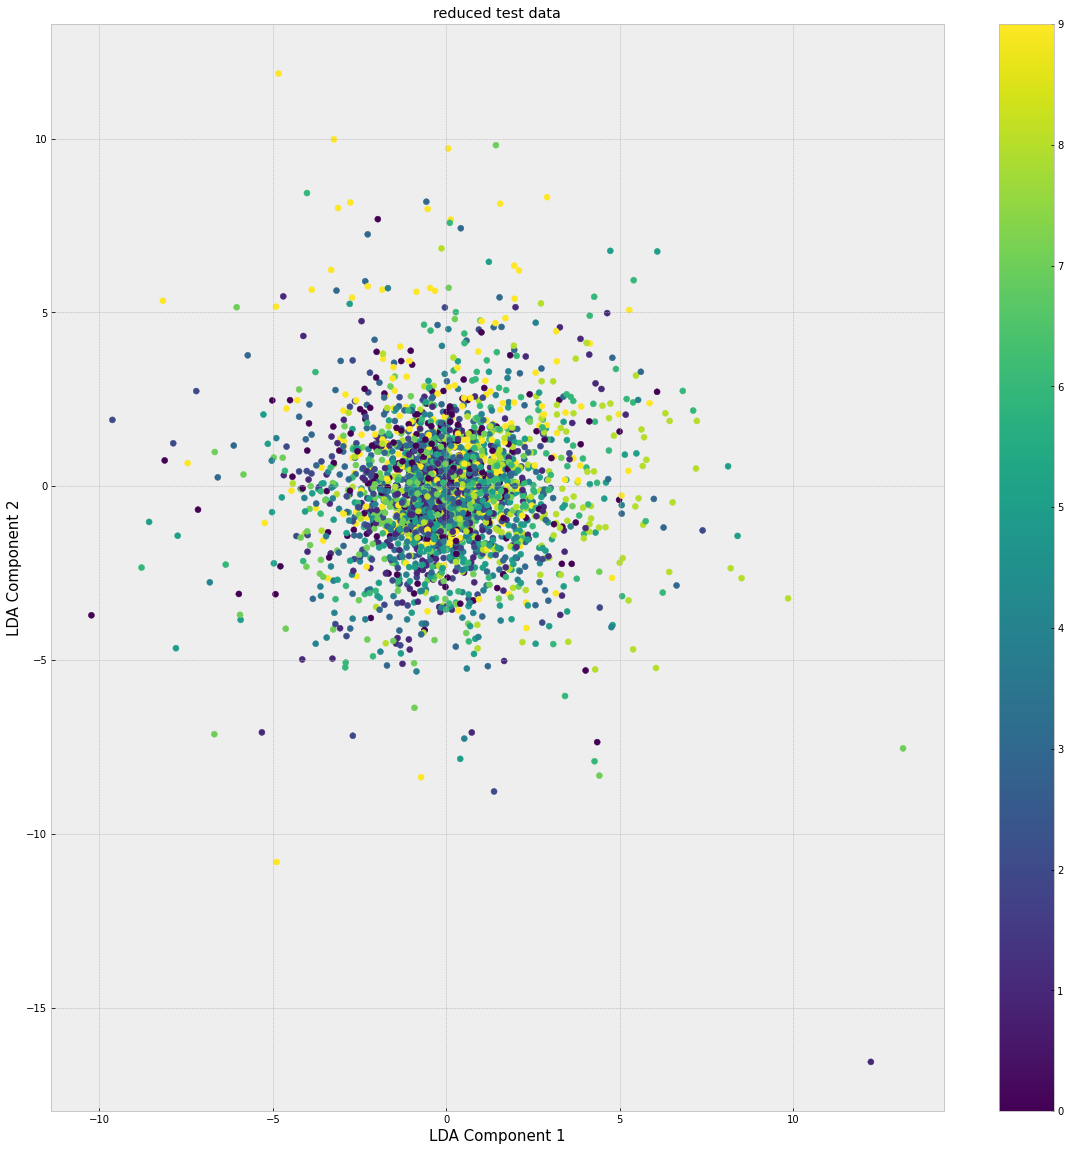

In [26]:
# on test data
lda_out_rd2 = lda_model.transform(X_test_resize)
plt.figure(figsize=(20,20))
plt.scatter(lda_out_rd2[:,0], lda_out_rd2[:,1], c=t_test)
plt.xlabel('LDA Component 1', size=15)
plt.ylabel('LDA Component 2', size=15)
plt.title('reduced test data')
plt.colorbar();

### t-SNE

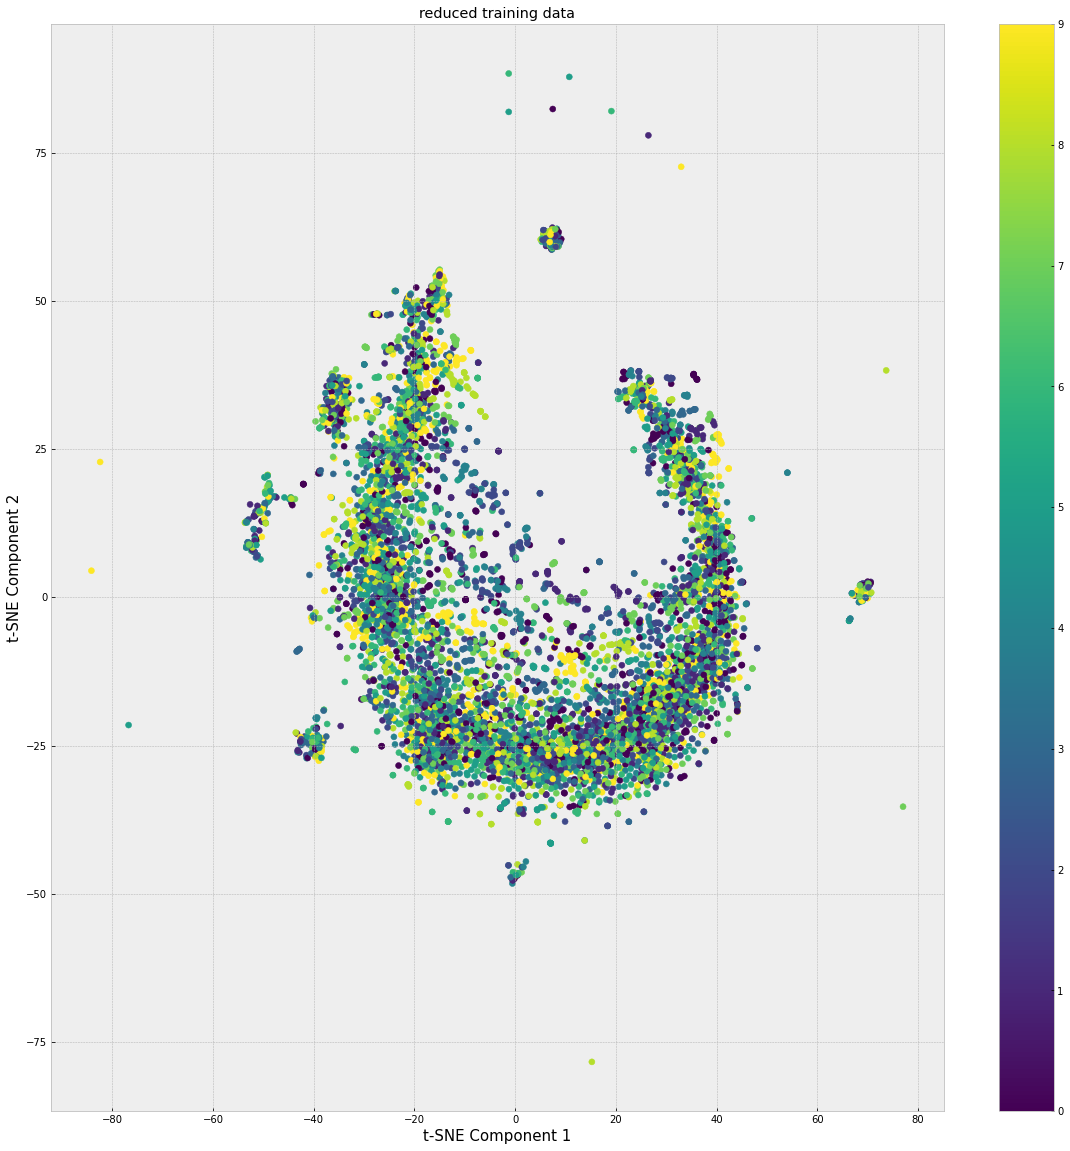

In [27]:
# on training data
ts_out_rd = ts_model.fit_transform(X_train_resize,t_train)
plt.figure(figsize=(20,20))
plt.scatter(ts_out_rd[:,0], ts_out_rd[:,1], c=t_train)
plt.xlabel('t-SNE Component 1', size=15)
plt.ylabel('t-SNE Component 2', size=15)
plt.title('reduced training data')
plt.colorbar();

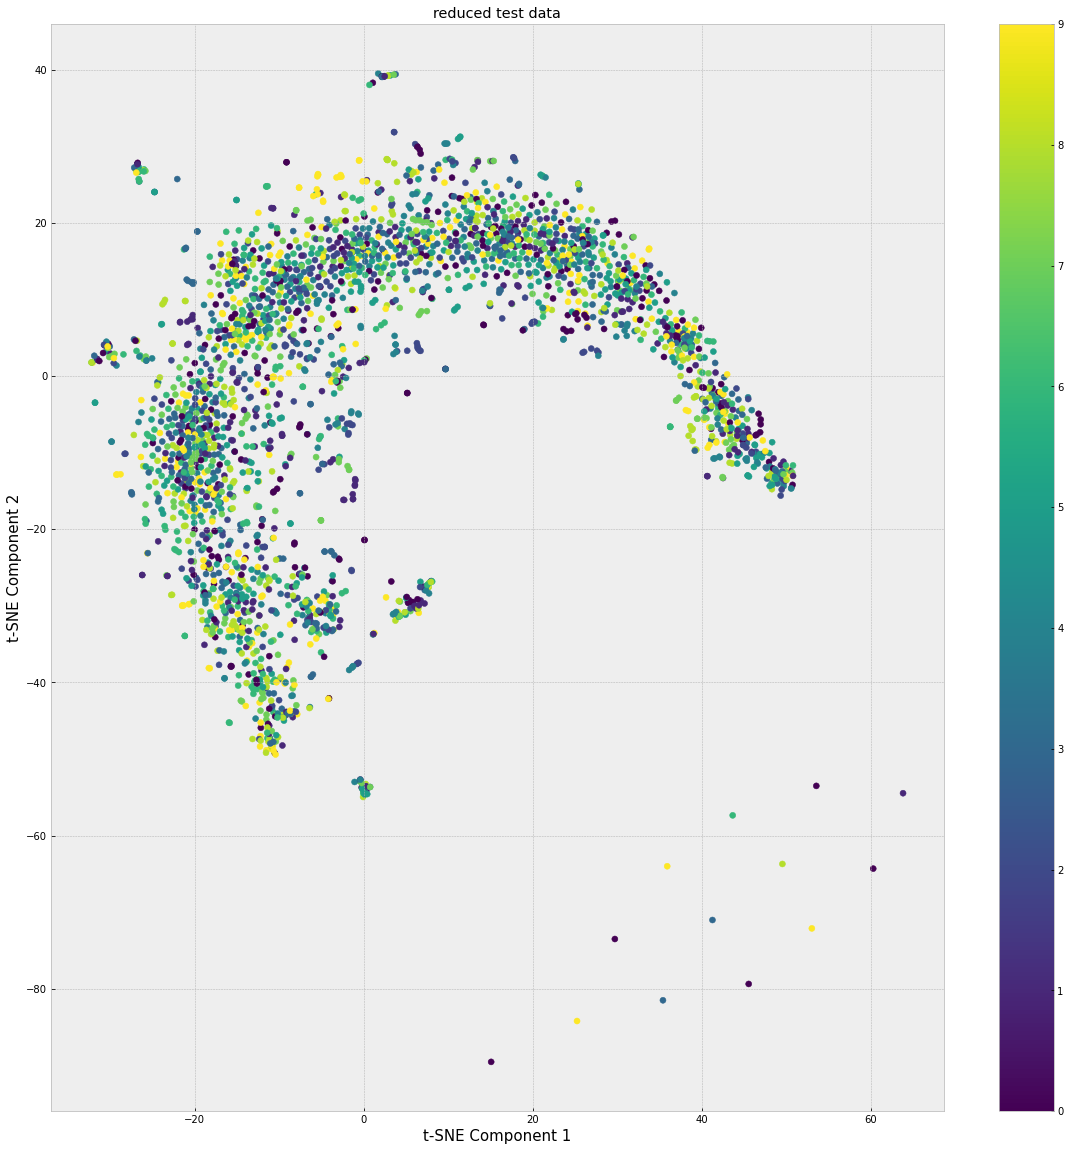

In [28]:
# on test data
ts_out_rd2 = ts_model.fit_transform(X_test_resize,t_test)
plt.figure(figsize=(20,20))
plt.scatter(ts_out_rd2[:,0], ts_out_rd2[:,1], c=t_test)
plt.xlabel('t-SNE Component 1', size=15)
plt.ylabel('t-SNE Component 2', size=15)
plt.title('reduced test data')
plt.colorbar();

### PCA 

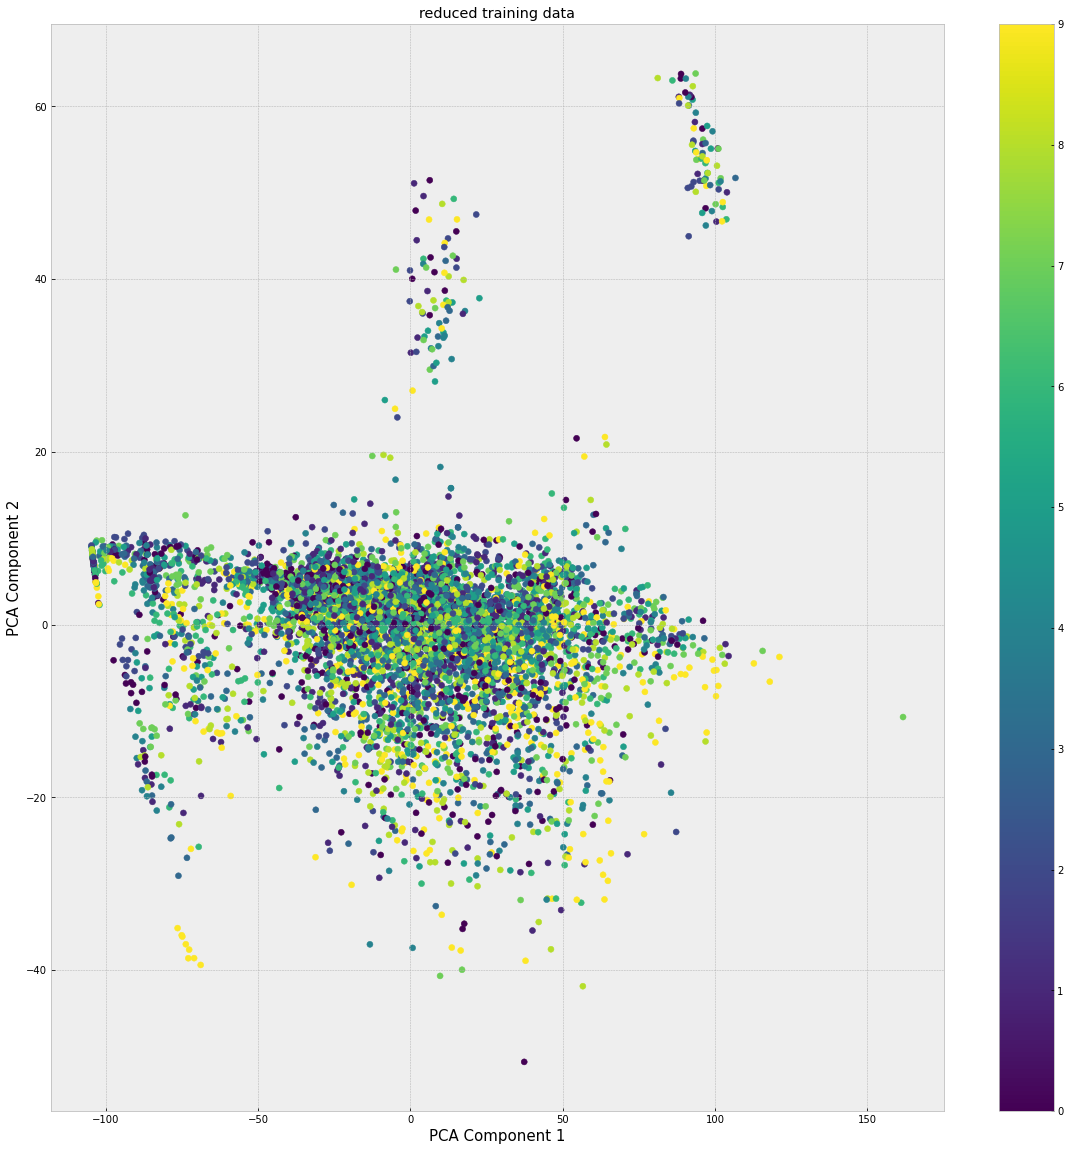

In [29]:
# on training data
pca_out_rd = pca_model.fit_transform(X_train_resize,t_train)
plt.figure(figsize=(20,20))
plt.scatter(pca_out_rd[:,0], pca_out_rd[:,1], c=t_train)
plt.xlabel('PCA Component 1', size=15)
plt.ylabel('PCA Component 2', size=15)
plt.title('reduced training data')
plt.colorbar();

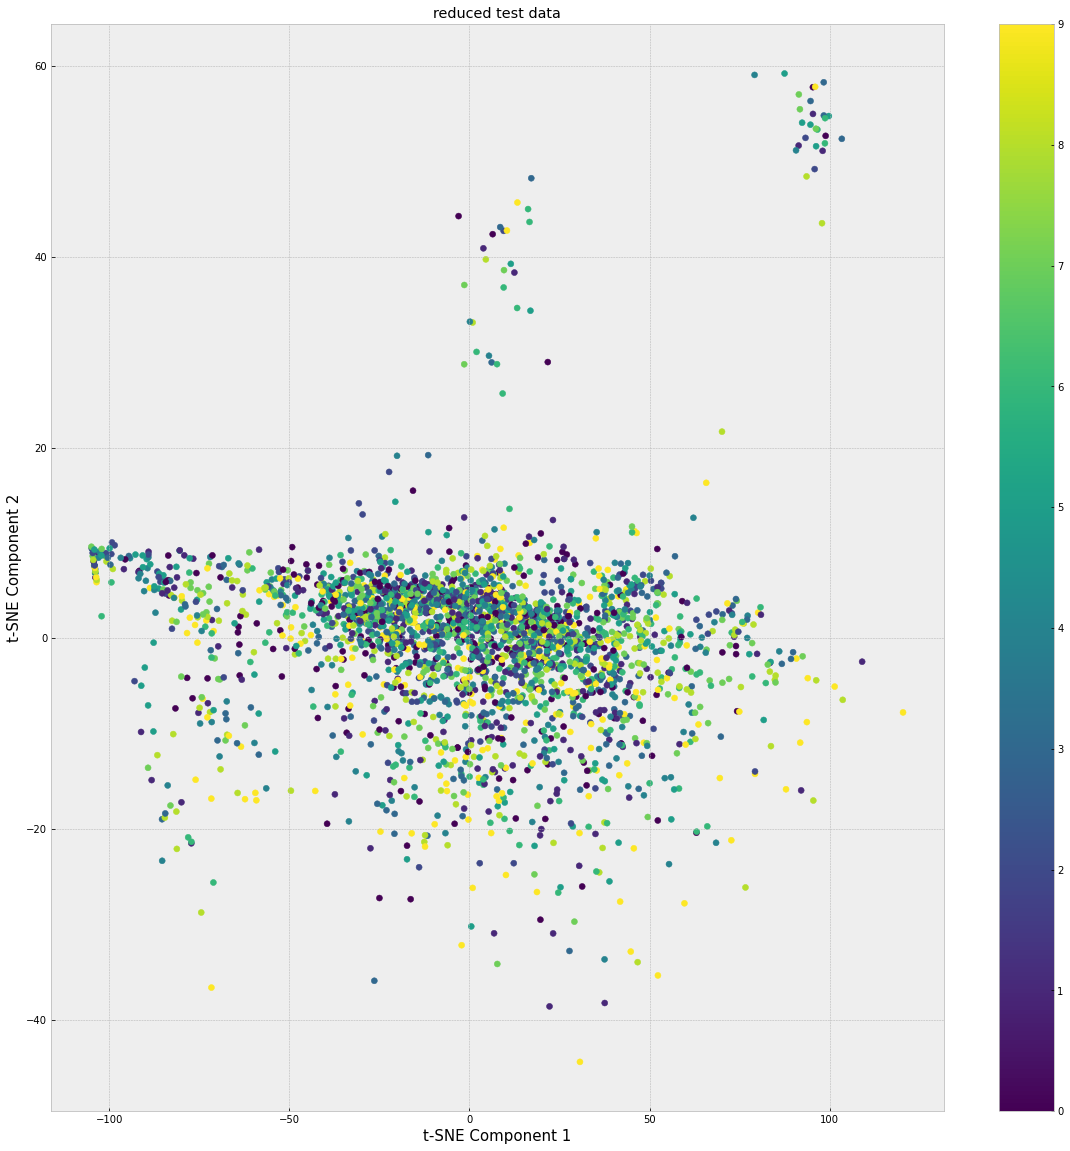

In [30]:
# on test data
pca_out_rd2 = pca_model.transform(X_test_resize)
plt.figure(figsize=(20,20))
plt.scatter(pca_out_rd2[:,0], pca_out_rd2[:,1], c=t_test)
plt.xlabel('t-SNE Component 1', size=15)
plt.ylabel('t-SNE Component 2', size=15)
plt.title('reduced test data')
plt.colorbar();

After comparing projections of LDA and t-SNE with the projections of PCA, it is clear that LDA should be preferred over the other two because by observing the projections, it can be concluded that each class is separable.

## Question 4

Implementing 3 manifold learning algorithms for reducing the dimensionality of the feature space and build a classifier.
The manifold learning algorithms used are-
1. MDS
2. ISOMAP
3. LLE

In [31]:
# For MDS I will create a custom class.
#This code has been based on the pipeline lectures
class MDS2(BaseEstimator, TransformerMixin):
    def __init__ (self,n): # no *args or **kargs
        self.n = n
        self.MDS = MDS(n_components=self.n,dissimilarity = 'euclidean',max_iter = 50)
    def fit(self, X, y=None):
        self.MDS.fit_transform(X)
        return self # nothing else to do
    def transform(self, X):
        return self.MDS.fit_transform(X)
# Load models
final_MDS_model=joblib.load("final_MDS_model.pkl")
final_iso_model=joblib.load("final_iso_model.pkl")
final_lle_model=joblib.load("final_lle_model.pkl")

### Evaluating the performance of the Manifold learning Algorithms

### MDS

In [32]:
mds_out = final_MDS_model.predict(X_test_resize)
# Getting the Classification report
print(classification_report(t_test,mds_out))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       274
         1.0       0.00      0.00      0.00       273
         2.0       0.00      0.00      0.00       285
         3.0       0.00      0.00      0.00       296
         4.0       0.11      1.00      0.19       309
         5.0       0.00      0.00      0.00       296
         6.0       0.00      0.00      0.00       291
         7.0       0.00      0.00      0.00       280
         8.0       0.00      0.00      0.00       291
         9.0       0.00      0.00      0.00       285

    accuracy                           0.11      2880
   macro avg       0.01      0.10      0.02      2880
weighted avg       0.01      0.11      0.02      2880



### ISOMAP

In [33]:
iso_out = final_iso_model.predict(X_test_resize)
# Getting the Classification report
print(classification_report(t_test,iso_out))

              precision    recall  f1-score   support

         0.0       0.21      0.30      0.25       274
         1.0       0.20      0.30      0.24       273
         2.0       0.23      0.33      0.27       285
         3.0       0.19      0.17      0.18       296
         4.0       0.22      0.12      0.15       309
         5.0       0.21      0.21      0.21       296
         6.0       0.22      0.23      0.23       291
         7.0       0.27      0.15      0.19       280
         8.0       0.36      0.19      0.25       291
         9.0       0.24      0.27      0.25       285

    accuracy                           0.23      2880
   macro avg       0.23      0.23      0.22      2880
weighted avg       0.23      0.23      0.22      2880



### LLE

In [34]:
lle_out = final_lle_model.predict(X_test_resize)
# Getting the Classification report
print(classification_report(t_test,lle_out))

              precision    recall  f1-score   support

         0.0       0.24      0.30      0.27       274
         1.0       0.24      0.25      0.25       273
         2.0       0.27      0.29      0.28       285
         3.0       0.18      0.22      0.20       296
         4.0       0.27      0.22      0.24       309
         5.0       0.27      0.19      0.22       296
         6.0       0.21      0.26      0.23       291
         7.0       0.28      0.24      0.26       280
         8.0       0.26      0.27      0.27       291
         9.0       0.28      0.24      0.26       285

    accuracy                           0.25      2880
   macro avg       0.25      0.25      0.25      2880
weighted avg       0.25      0.25      0.25      2880



### Visualize and interpret what the first 2 dimensions in the trained manifold learning algorithm  

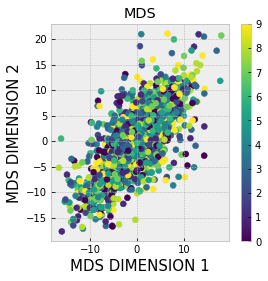

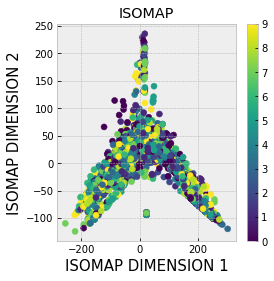

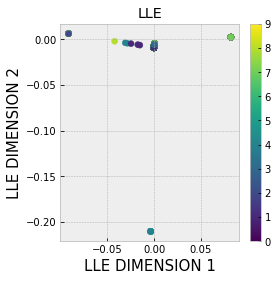

In [36]:
k1 = final_MDS_model.named_steps['MDS2'].MDS.embedding_[:,0:2]
k2 = final_iso_model.named_steps['Isomap'].embedding_
k3 = final_lle_model.named_steps['LLE'].embedding_ 

#MDS PLOT
plt.figure(figsize=(4,4))
plt.scatter(k1[:,0], k1[:,1], c=t_test)
plt.xlabel('MDS DIMENSION 1', size=15)
plt.ylabel('MDS DIMENSION 2', size=15)
plt.title('MDS')
plt.colorbar();
#ISOMAP PLOT
plt.figure(figsize=(4,4))
plt.scatter(k2[:,0], k2[:,1], c=t_train)
plt.xlabel('ISOMAP DIMENSION 1', size=15)
plt.ylabel('ISOMAP DIMENSION 2', size=15)
plt.title('ISOMAP')
plt.colorbar();
#LLE PLOT
plt.figure(figsize=(4,4))
plt.scatter(k3[:,0], k3[:,1], c=t_train)
plt.xlabel('LLE DIMENSION 1', size=15)
plt.ylabel('LLE DIMENSION 2', size=15)
plt.title('LLE')
plt.colorbar();